<a href="https://colab.research.google.com/github/vinaykbansal/BNFO301Data/blob/main/MSProj1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Model

**Loading the basic libraries**

In [117]:
# Some basic setting and configs
DATA_FILE_GITHUB = "https://raw.githubusercontent.com/MusBansal/BNFO301Data/main/trial4.csv"
DEFAULT_FILE_NAME = 'trial4.csv'

# Do analysis based on the diff/slope

DIFF_ANALYSIS = False

USE_FIX_CLUSTER_SIZE = False
clusterSizeFix = 4

#
comp_label = 'polyphen_class'
comp_label = 'mutation_assessor_class'


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip3 install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import os.path
# Load the file 
# DATA_FILE_GITHUB = "https://raw.githubusercontent.com/MusBansal/VertEvolConservedThesisData/main/trial.csv"
# DEFAULT_FILE_NAME = 'trial.csv'


fileName = DEFAULT_FILE_NAME
#Does the file exists locally, if not get it from the github
if not os.path.exists(fileName):
  #Load the file from Github to the local folder
  !wget --no-check-certificate --content-disposition $DATA_FILE_GITHUB
   
!ls

sample_data  trial3.csv  trial4.csv


**Loading the file in a dataframe**

In [120]:
# df = pd.read_csv("../data/Day 3/conn.log", sep="\t", skiprows=8, \
#         names=['timestamp','uid','src','sport','dst','dport','proto','service','duration','orig_bytes', \
#                'resp_bytes','conn_state','local_orig','local_resp','missed_bytes','history','orig_pkts', \
#                'orig_ip_bytes','resp_pkts','resp_ip_bytes','tunnel_parents'])
# df

df = pd.read_csv(fileName)
print ("Shape of the dataframe loaded", df.shape)
df.head()


Shape of the dataframe loaded (402, 52)


,VariantID,vf_allele,Alleles,AA,AA coord,AA coord.1,sift_sort,sift_class,SIFT,polyphen_sort,...,V14,V15,V16,V17,V18,Vertebrate_Mammalia,Mammalia_Primates,Vertebrates_Primates,Polyphen_Numeric,po
0,rs1578794673,A,C/A,R/I,630,630,1,deleterious,0.00,985,...,0.845,0.853,0.853,0.854,0.859,0.310,-0.493,-0.016636,1.0,NaN
1,rs777141680,T,G/T,P/H,628,628,51,deleterious,0.05,519,...,1.000,1.000,1.000,1.000,1.000,-0.012,0.993,0.089182,0.5,NaN
2,rs762123879,A,C/A/T,R/L,627,627,1,deleterious,0.00,991,...,0.845,0.853,0.853,0.854,0.859,0.502,0.067,0.051727,1.0,NaN
3,rs762123879,T,C/A/T,R/H,627,627,1,deleterious,0.00,995,...,0.845,0.853,0.853,0.854,0.859,0.502,0.067,0.051727,1.0,NaN
4,rs1184066844,A,G/A/C,R/C,627,627,41,deleterious,0.04,998,...,1.000,1.000,1.000,1.000,1.000,0.280,-0.616,-0.030545,1.0,NaN


In [121]:
#Print the column names
df.columns

Index(['VariantID', 'vf_allele', 'Alleles', 'AA', 'AA coord', 'AA coord.1',
       'sift_sort', 'sift_class', 'SIFT', 'polyphen_sort', 'polyphen_class',
       'PolyPhen', 'cadd_sort', 'cadd_class', 'CADD', 'revel_sort',
       'revel_class', 'REVEL', 'meta_lr_sort', 'meta_lr_class', 'MetaLR',
       'mutation_assessor_sort', 'mutation_assessor_class',
       'Mutation Assessor', 'Unnamed: 24', 'M1', 'M2', 'M3', 'M4', 'V1', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'Vertebrate_Mammalia',
       'Mammalia_Primates', 'Vertebrates_Primates', 'Polyphen_Numeric', 'po'],
      dtype='object')

In [122]:
#df['Vertebrate_Mammalia'].head(), df['Mammalia_Primates'].head()

In [123]:
#load only specific columns

columns = ['V1', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18'
]

#Loading the file with specified columns only
df_small = pd.read_csv(fileName, usecols=columns)
print ("Shape of the dataframe loaded", df.shape)
df_small



Shape of the dataframe loaded (402, 52)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
0,0.164,0.171,0.239,0.251,0.267,0.474,0.460,0.436,0.403,0.249,-0.019,-0.034,-0.055,0.845,0.853,0.853,0.854,0.859
1,-0.015,-0.015,-0.015,-0.015,-0.015,-0.027,-0.027,-0.029,0.100,0.134,0.966,0.951,0.918,1.000,1.000,1.000,1.000,1.000
2,0.232,0.242,0.338,0.354,0.378,0.734,0.778,0.778,0.789,0.796,0.801,0.794,0.769,0.845,0.853,0.853,0.854,0.859
3,0.232,0.242,0.338,0.354,0.378,0.734,0.778,0.778,0.789,0.796,0.801,0.794,0.769,0.845,0.853,0.853,0.854,0.859
4,0.325,0.339,0.474,0.496,0.529,0.605,0.642,0.615,0.578,0.395,-0.011,-0.026,-0.044,1.000,1.000,1.000,1.000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.659,0.687,0.763,0.756,0.807,0.811,0.810,0.810,0.813,0.823,0.845,0.849,0.852,0.857,0.865,0.868,0.865,0.859
398,0.659,0.687,0.763,0.756,0.807,0.811,0.810,0.810,0.813,0.823,0.845,0.849,0.852,0.857,0.865,0.868,0.865,0.859
399,0.493,0.514,0.537,0.523,0.558,0.502,0.489,0.466,0.425,0.271,-0.015,-0.027,-0.048,-0.083,0.865,0.868,0.865,0.859
400,0.192,0.200,0.340,0.412,0.440,0.471,0.652,0.626,0.578,0.395,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [124]:
# df_small_mean = df_small.mean()
# df_small_sd = df_small.std()

# df_small_mean, df_small_sd

In [125]:
#Scaling

from sklearn.preprocessing import scale
from pandas import DataFrame

scaled_df = DataFrame(scale(df_small), index=df_small.index, columns=df_small.columns)
scaled_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
0,0.565225,0.564365,0.637797,0.630303,0.637328,1.171915,1.066799,0.922120,0.743353,0.000642,-1.054546,-1.213913,-1.524220,0.305122,0.184082,0.083388,-0.084283,-0.022199
1,-0.462974,-0.469436,-0.514742,-0.519742,-0.518932,-0.569049,-0.573735,-0.596588,-0.211489,-0.308342,1.073366,0.918819,0.666996,0.700435,0.581588,0.545046,0.542364,0.467794
2,0.955826,0.958988,1.087015,1.075621,1.092452,2.075409,2.138031,2.039106,1.959752,1.470329,0.716913,0.578881,0.331445,0.305122,0.184082,0.083388,-0.084283,-0.022199
3,0.955826,0.958988,1.087015,1.075621,1.092452,2.075409,2.138031,2.039106,1.959752,1.470329,0.716913,0.578881,0.331445,0.305122,0.184082,0.083388,-0.084283,-0.022199
4,1.490030,1.498121,1.704123,1.689555,1.711584,1.627137,1.679894,1.506741,1.294829,0.392916,-1.037264,-1.196591,-1.499448,0.700435,0.581588,0.545046,0.542364,0.467794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,3.408569,3.432329,3.015476,2.813660,2.851444,2.342982,2.245828,2.143619,2.035383,1.542873,0.811967,0.697968,0.518362,0.335727,0.216532,0.130496,-0.037070,-0.022199
398,3.408569,3.432329,3.015476,2.813660,2.851444,2.342982,2.245828,2.143619,2.035383,1.542873,0.811967,0.697968,0.518362,0.335727,0.216532,0.130496,-0.037070,-0.022199
399,2.455043,2.470783,1.989989,1.806289,1.830491,1.269214,1.164490,1.020101,0.812681,0.059752,-1.045905,-1.198756,-1.508456,-2.061654,0.216532,0.130496,-0.037070,-0.022199
400,0.726061,0.725549,1.096090,1.326383,1.346665,1.161490,1.713581,1.542668,1.294829,0.392916,1.146816,1.024915,0.851661,0.700435,0.581588,0.545046,0.542364,0.467794


## K-Mean Cluster and Analysis

In [126]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

## Finding opimal Knee value

In [127]:
#https://practicaldatascience.co.uk/machine-learning/how-to-use-knee-point-detection-in-k-means-clustering

#!pip3 install kneed

from kneed import KneeLocator

For n_clusters = 2 The average silhouette_score is : 0.41177283079827276
For n_clusters = 3 The average silhouette_score is : 0.41627688312023486
For n_clusters = 4 The average silhouette_score is : 0.36853136381436097
For n_clusters = 5 The average silhouette_score is : 0.37816564330343516
For n_clusters = 6 The average silhouette_score is : 0.36371562906376737
For n_clusters = 7 The average silhouette_score is : 0.37518125562170745
For n_clusters = 8 The average silhouette_score is : 0.3683526497727138
For n_clusters = 9 The average silhouette_score is : 0.38512504806188863


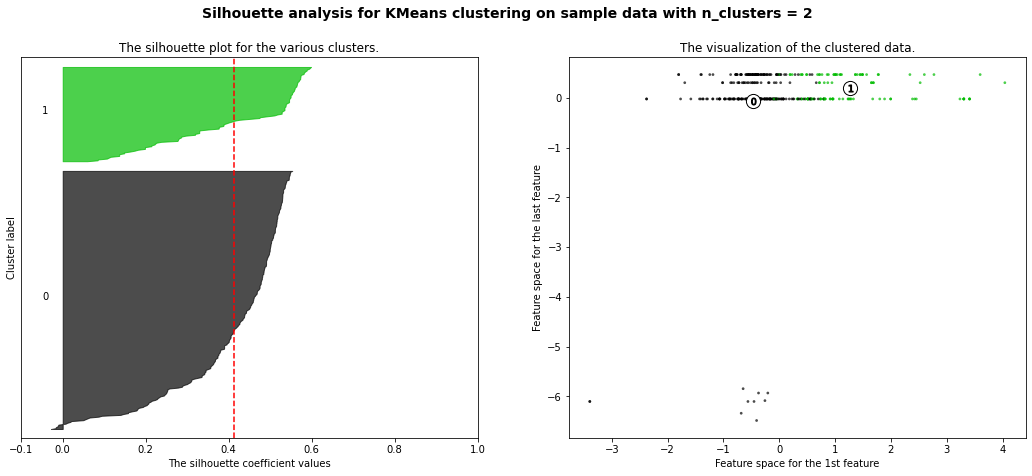

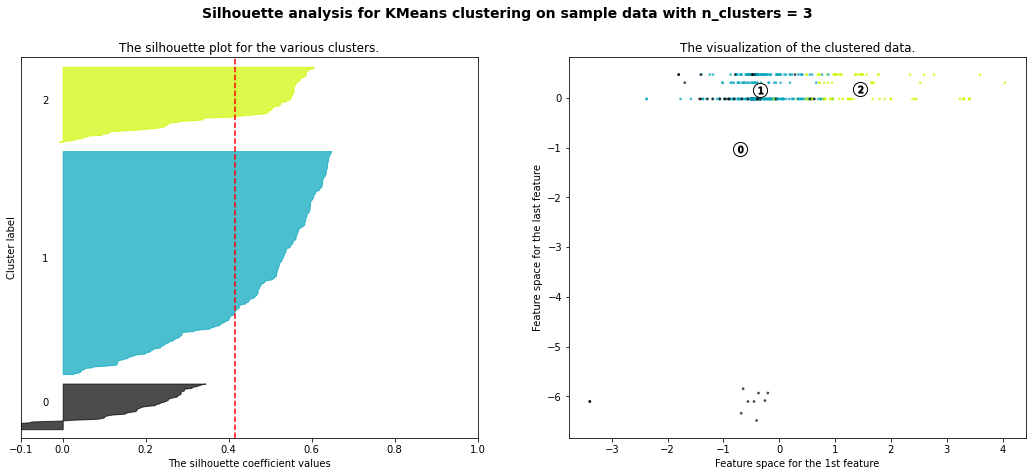

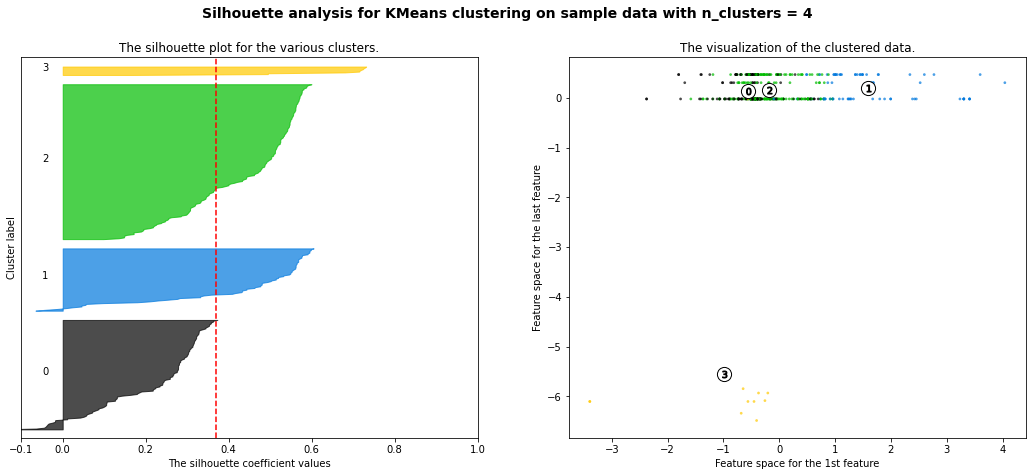

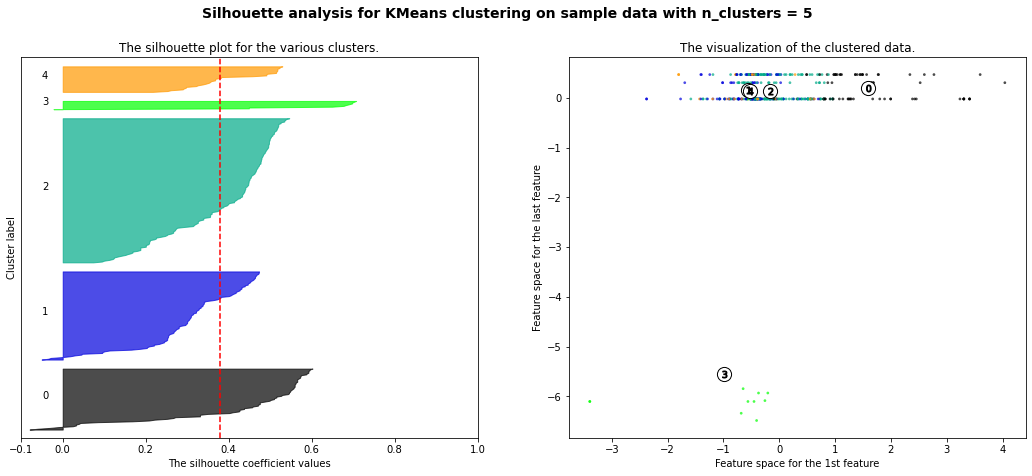

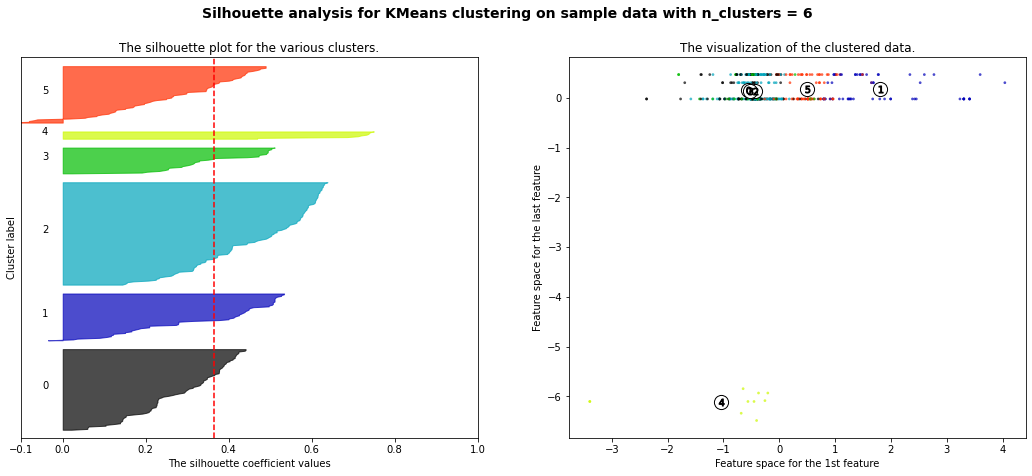

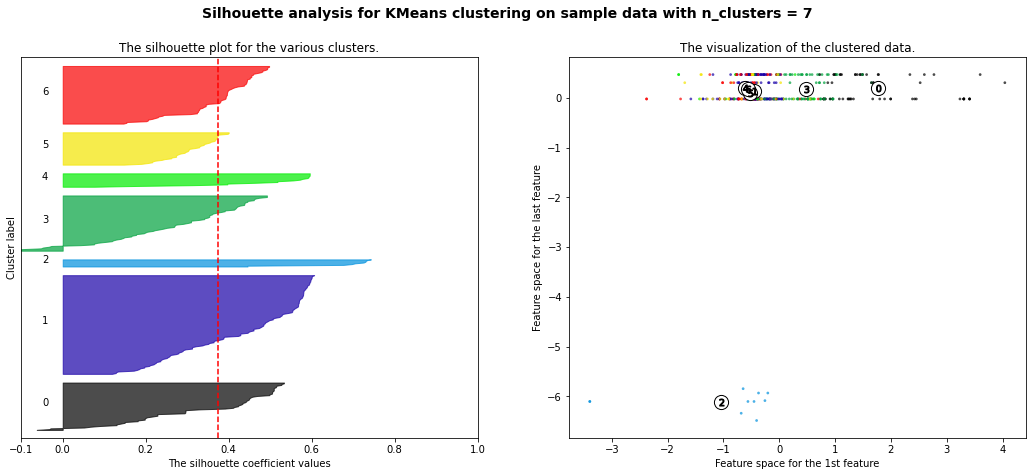

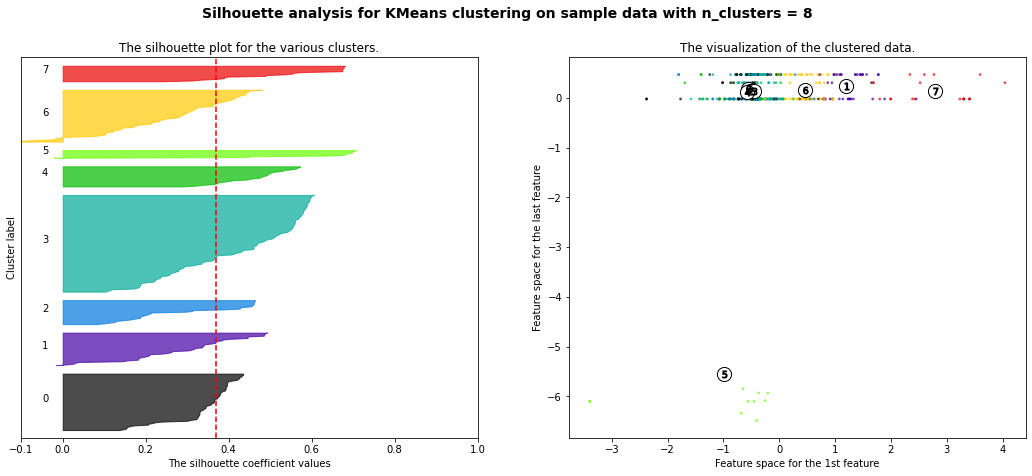

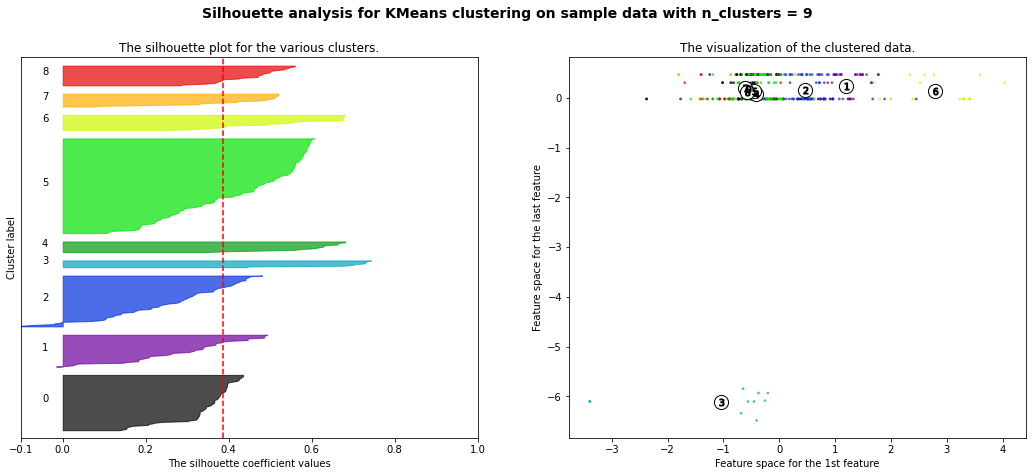

In [128]:

# trying with cluster size 2, n

range_n_clusters = [*range(2,10)]
#range_n_clusters = [5]

#Putting the dataframe to an array
X = scaled_df.to_numpy()


#Create a dict to store the intertia of the Kmean clusters, later to be used in Knee analysis
wssDic = {}

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    #Capture the WSS/Variance
    wssDic[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, -1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, -1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[-1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the last feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

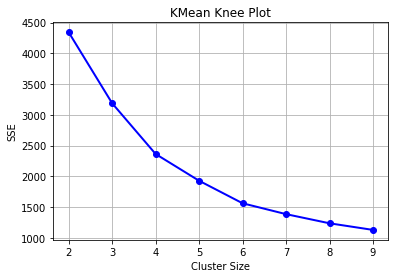

In [129]:
#Knee plot for K-mean

import matplotlib.pyplot as plt
import numpy as np

#PC_values = np.arange(pca.n_components_) + 1
clusterSizes = list(wssDic.keys())
varianceExp = list(wssDic.values())
plt.plot(clusterSizes, varianceExp, 'o-', linewidth=2, color='blue')
plt.xticks(clusterSizes)
plt.title('KMean Knee Plot')
plt.xlabel('Cluster Size')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [130]:
kn = KneeLocator(x=clusterSizes, y=varianceExp, curve='convex', direction='decreasing')

optimalClusterSize = kn.knee

optimalClusterSize

4

## Plotting K Mean clustering

In [131]:
# Perform K mean clustering for optimal cluster size

if USE_FIX_CLUSTER_SIZE :
  clusterSize = clusterSizeFix
else:
  clusterSize = optimalClusterSize

print("Using Cluster Size:",clusterSize)

clusterer = KMeans(n_clusters=clusterSize, random_state=10)
cluster_labels = clusterer.fit_predict(X)



Using Cluster Size: 4


## Line Plots

In [132]:
# Copy data in different dataframes

clusterIds = np.unique(cluster_labels)

dataDic = {}

for clusterId in clusterIds:
  dataDic[clusterId] = df_small[cluster_labels == clusterId].T

#dataDic


In [133]:
dataDic[0].shape

(18, 131)

In [134]:
# import matplotlib.colors as mcolors

# # mcolors.BASE_COLORS #these colors can be called with a single character

# # mcolors.TABLEAU_COLORS #the default color cycle colors

# # mcolors.CSS4_COLORS #named colors also recognized in css

# # mcolors.XKCD_COLORS #named colors from the xkcd survey

# # for color in mcolors.XKCD_COLORS:
# #   print(color)

# type(mcolors.TABLEAU_COLORS)


# for color, x in zip(mcolors.TABLEAU_COLORS, Xs):
#   print(color,x)

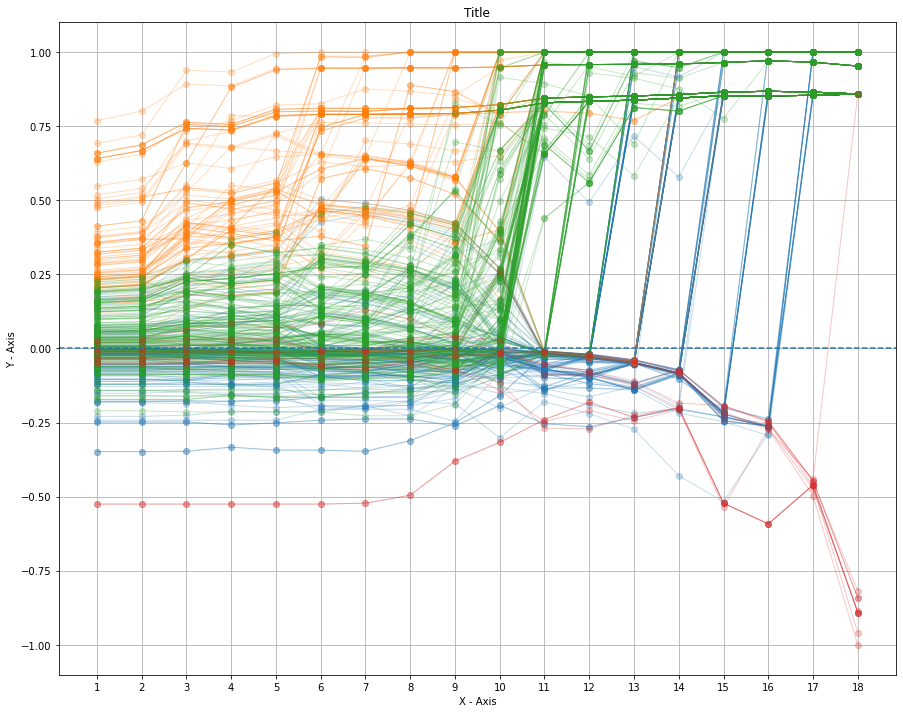

In [135]:
#Plotting
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as mcolors


plt.figure(figsize = (15,12))

Xs = [*range(1,19)]


for Ys,color in zip(dataDic.values(), mcolors.TABLEAU_COLORS ):

  #Ys = dataDic[0]
  plt.plot(Xs,Ys, 'o-', linewidth=1, color=color, alpha =0.25)


plt.xticks(Xs)
plt.title('Title')
plt.xlabel('X - Axis')
plt.ylabel('Y - Axis')
plt.axhline(ls = "--")
plt.grid()
plt.show()

In [136]:
Ys.mean(axis=1)

V1    -0.107364
V2    -0.107182
V3    -0.103727
V4    -0.101364
V5    -0.101455
V6    -0.109727
V7    -0.105909
V8    -0.097182
V9    -0.087000
V10   -0.061091
V11   -0.112727
V12   -0.107818
V13   -0.133545
V14   -0.143818
V15   -0.352545
V16   -0.378909
V17   -0.460182
V18   -0.732000
dtype: float64

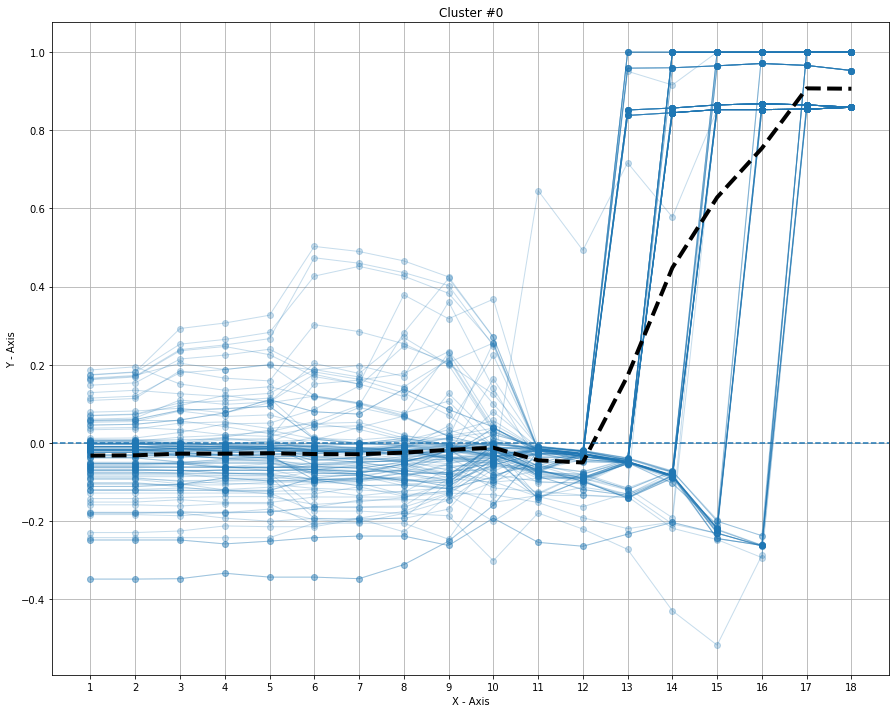

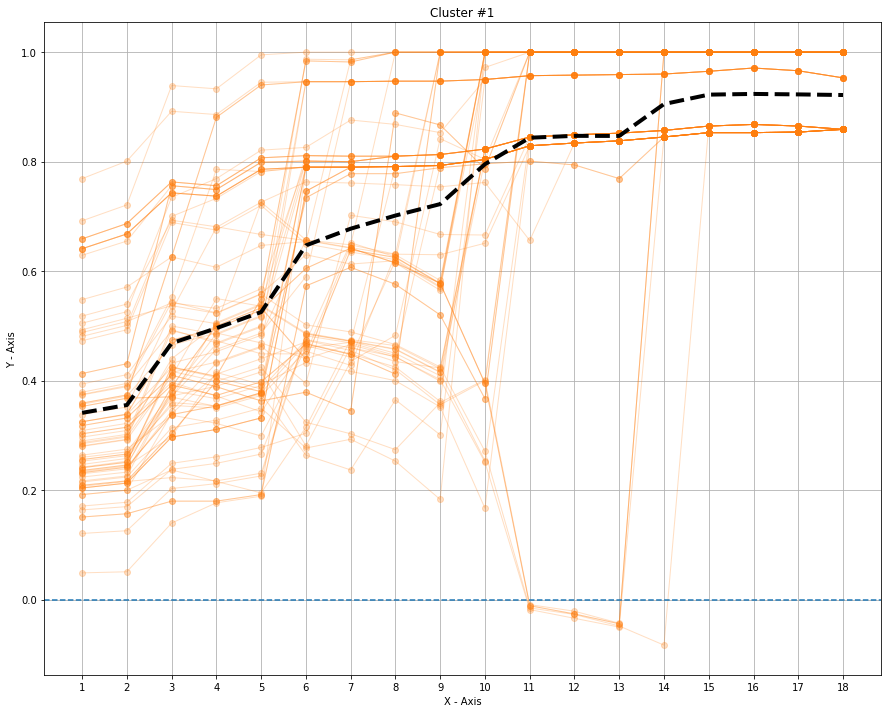

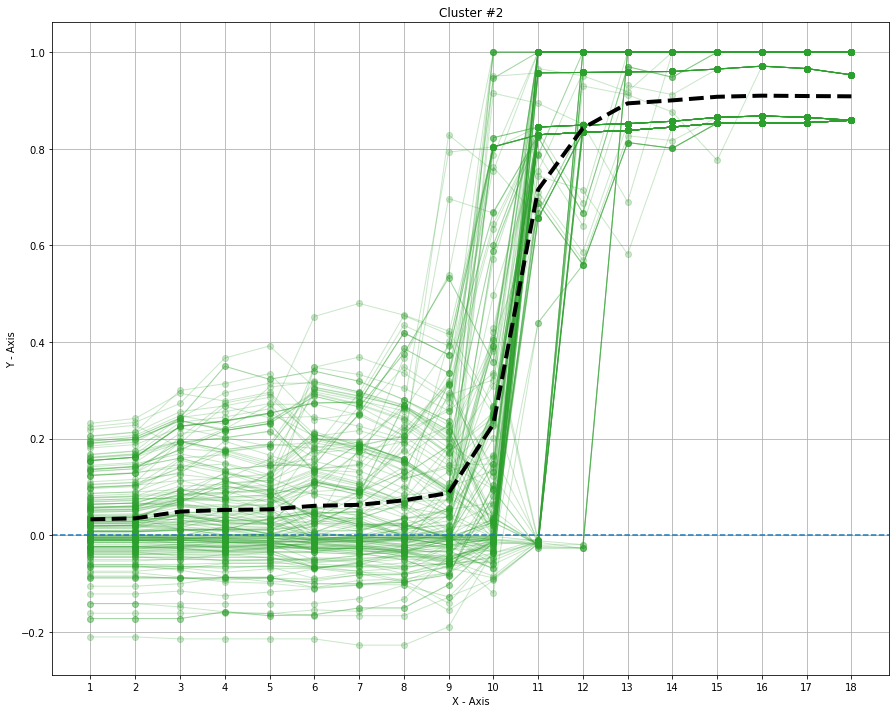

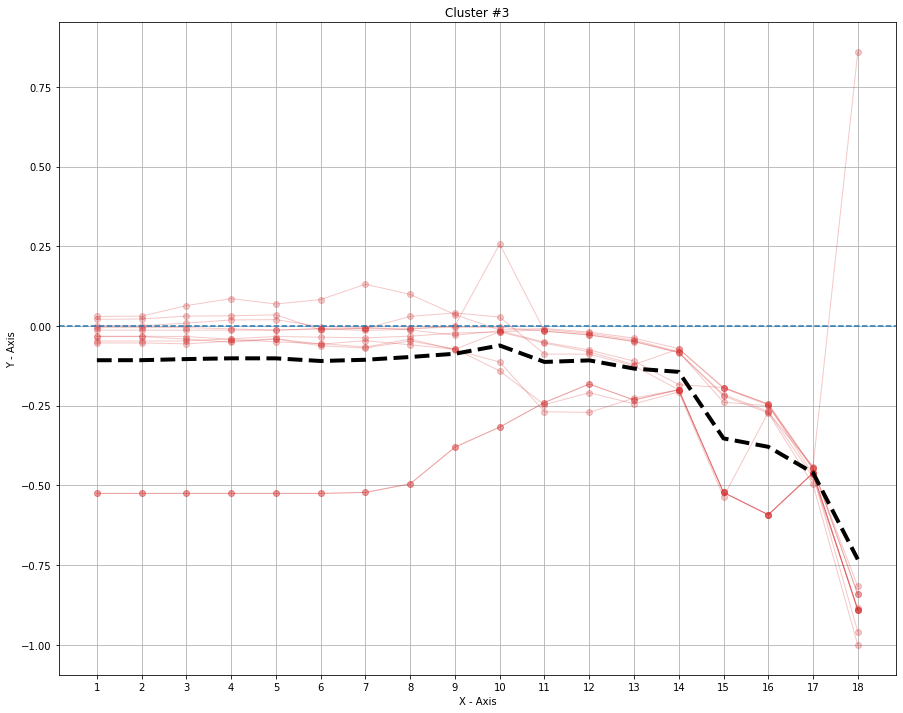

In [137]:
# Separate plot for each cluster

#Plotting
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as mcolors





for i, Ys,color in zip(dataDic.keys(), dataDic.values(), mcolors.TABLEAU_COLORS ):

  plt.figure(figsize = (15,12))

  Xs = [*range(1,19)]

  #Ys = dataDic[0]
  plt.plot(Xs,Ys, 'o-', linewidth=1, color=color, alpha =0.25)

  #Plot the mean
  YMean = Ys.mean(axis=1)
  plt.plot(Xs,YMean, '--', linewidth=4, color='black', alpha =1)

  plt.xticks(Xs)
  plt.title('Cluster #' + str(i))
  plt.xlabel('X - Axis')
  plt.ylabel('Y - Axis')
  plt.axhline(ls = "--")
  plt.grid()
  plt.show()

## PCA Analysis

* z<-z[,-c(19:21)]
* res.pca <-prcomp(z,scale=TRUE)
* fviz_pca_ind(res.pca,label = "none", habillage=kc_fga$cluster,* palette = c("red","blue","yellow","orange","green","purple"))
* fviz_eig(res.pca)
* biplot(res.pca,scale=0,cex=.7)


In [138]:
# http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/118-principal-component-analysis-in-r-prcomp-vs-princomp/

In [139]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver = "full")
pc = pca.fit_transform(X)
#pd.DataFrame(pc)
pca.explained_variance_ratio_

array([5.77127850e-01, 2.03031059e-01, 9.15784571e-02, 3.96646225e-02,
       2.43302169e-02, 1.76604711e-02, 1.24611785e-02, 1.00767345e-02,
       7.31120811e-03, 5.38655454e-03, 4.41586984e-03, 2.54950977e-03,
       2.25535824e-03, 1.21277612e-03, 4.62245446e-04, 3.14091457e-04,
       1.58672483e-04, 3.12388611e-06])

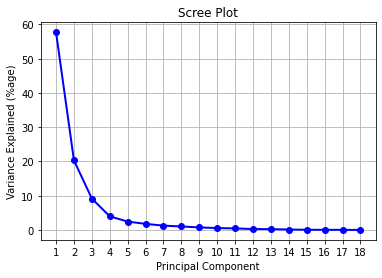

In [140]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, 100* pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%age)')

plt.xticks(PC_values)
plt.grid()
plt.show()

In [141]:
#clusterer.cluster_centers_

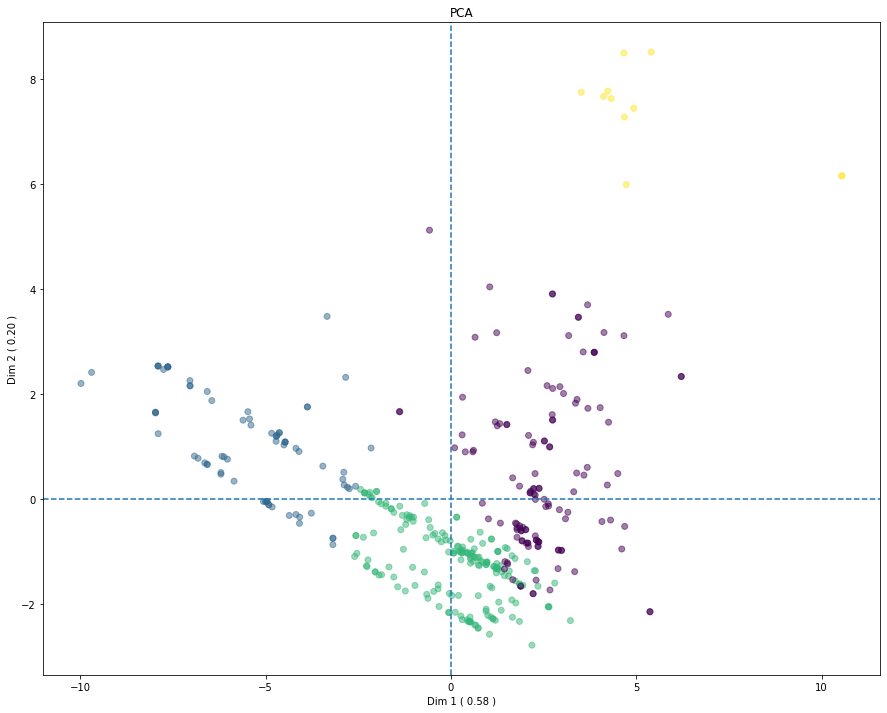

In [142]:
import matplotlib.pyplot as plt
import numpy as np


#Scatterpolt
x_dim = pc[:,0]
y_dim = pc[:,1]

plt.figure(figsize = (15,12))
PC_values = np.arange(pca.n_components_) + 1
plt.scatter(x= x_dim, y = y_dim, alpha=0.5, c= cluster_labels )
plt.title('PCA')
plt.xlabel('Dim 1 ( %.2f )' %pca.explained_variance_ratio_[0] )
plt.ylabel('Dim 2 ( %.2f )' %pca.explained_variance_ratio_[1] )

plt.axhline(ls = "--")
plt.axvline(ls = "--")
# plt.legend(labels = ["One", "Two", "Three", "Four"], labelcolor = ["red", "black", "yellow", "blue"])

plt.show()

## PCA

In [143]:
#Dimesion reduction via PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head() 

,principal component 1,principal component 2
0,-1.381138,1.666361
1,0.514920,-2.239843
2,-4.631746,1.265804
3,-4.631746,1.265804
4,-3.874072,1.758144


In [144]:
# Add the cluster labels

# finalDf = pd.concat([principalDf, cluster_labels, axis = 1)
# finalDf.head()

principalDf['ClusterId'] = cluster_labels.tolist()
principalDf.head() 

,principal component 1,principal component 2,ClusterId
0,-1.381138,1.666361,0
1,0.514920,-2.239843,2
2,-4.631746,1.265804,1
3,-4.631746,1.265804,1
4,-3.874072,1.758144,1


In [145]:
#principalDf['principal component 3'].mean()
principalDf.loc[principalDf['ClusterId'] == 1].mean()

principal component 1   -5.398317
principal component 2    1.038147
ClusterId                1.000000
dtype: float64

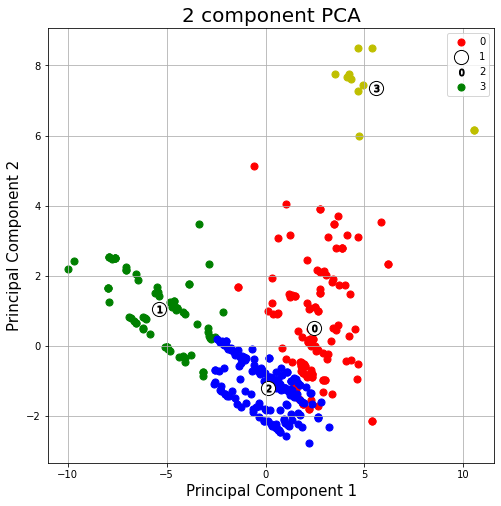

In [146]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = [*range(clusterSize)]
colors = ['r', 'g', 'b', 'y', 'k']



for target, color in zip(targets,colors):
    indicesToKeep = principalDf['ClusterId'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
    # Find the center of the cluster
    x_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[0]
    y_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[1]

    ax.scatter( x_c,   y_c,    marker="o",   c="white",  alpha=1, s=200,  edgecolor="k" )
    ax.scatter(x_c,   y_c,  marker="$%d$" % target, alpha=1, s=50, edgecolor="k")




ax.legend(targets)
ax.grid()

In [147]:
# 3d Plot with PCA for 3 dimensions


In [148]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head() 

,principal component 1,principal component 2,principal component 3
0,-1.381138,1.666361,-1.815837
1,0.514920,-2.239843,0.833383
2,-4.631746,1.265804,0.160934
3,-4.631746,1.265804,0.160934
4,-3.874072,1.758144,-2.783520


In [149]:
# Add the cluster labels



principalDf['ClusterId'] = cluster_labels.tolist()
principalDf.head() 

,principal component 1,principal component 2,principal component 3,ClusterId
0,-1.381138,1.666361,-1.815837,0
1,0.514920,-2.239843,0.833383,2
2,-4.631746,1.265804,0.160934,1
3,-4.631746,1.265804,0.160934,1
4,-3.874072,1.758144,-2.783520,1


In [150]:
#principalDf['ClusterId'].to_numpy()

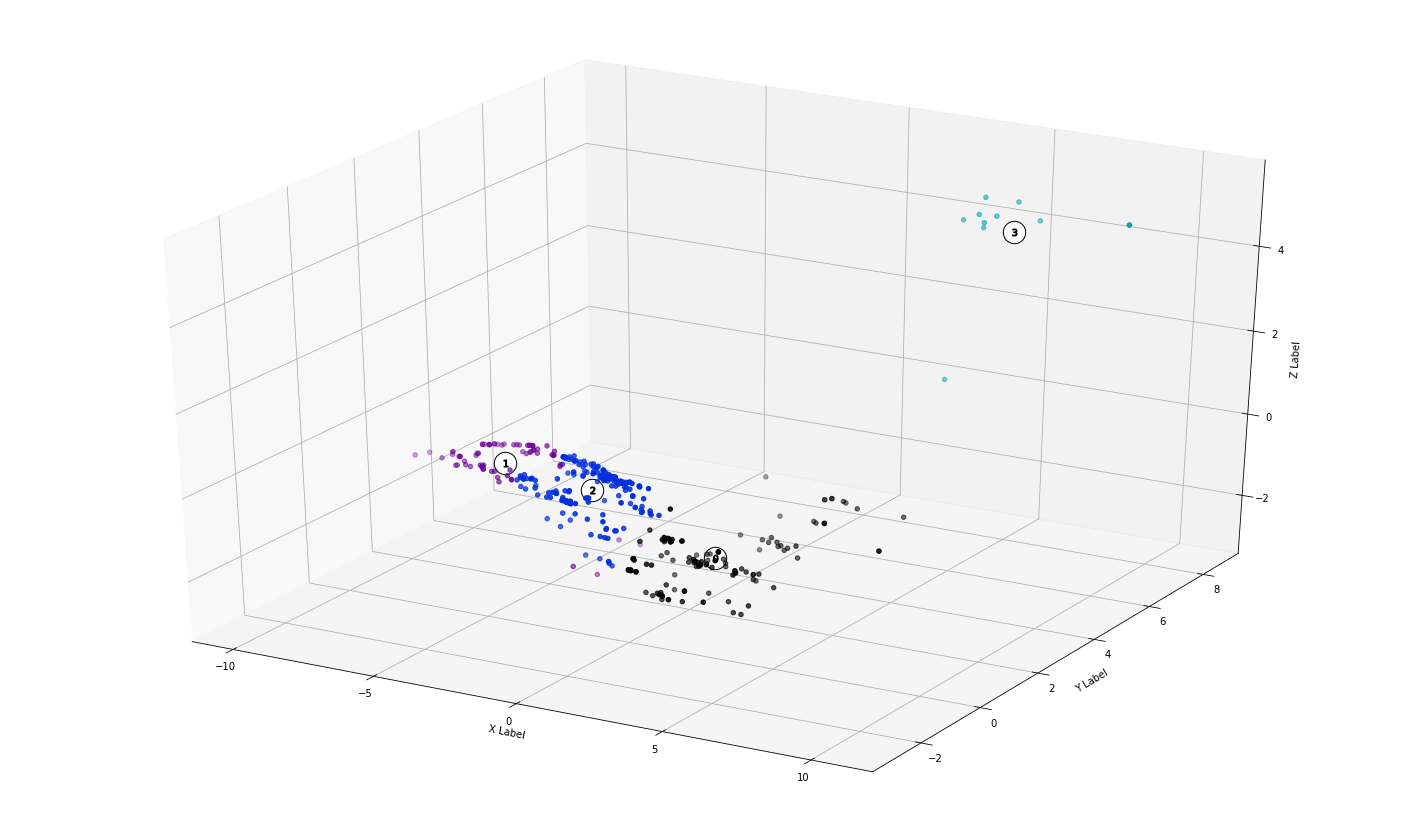

In [151]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(25)
ax = fig.add_subplot(projection='3d')


cluster_labels = principalDf['ClusterId'].to_numpy()
x= principalDf['principal component 1'].to_numpy()
y= principalDf['principal component 2'].to_numpy()
z= principalDf['principal component 3'].to_numpy()

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax.scatter(x,y,z, c= colors)


# Find the center of the cluster
for target in [0,1,2,3,4] :
    x_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[0]
    y_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[1]
    z_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[2]

    ax.scatter( x_c,   y_c, z_c,    marker="o",   c="white",  alpha=1, s=500,  edgecolor="k" )
    ax.scatter(x_c,   y_c, z_c, marker="$%d$" % target, alpha=1, s=50, edgecolor="k")


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Compairing with an existing property

Loading the data in data frame



In [152]:
# Add the cluster labels

# finalDf = pd.concat([principalDf, cluster_labels, axis = 1)
# finalDf.head()



principalDf['ClusterId'] = cluster_labels.tolist()
principalDf[comp_label] = df[comp_label]
principalDf.head() 

,principal component 1,principal component 2,principal component 3,ClusterId,mutation_assessor_class
0,-1.381138,1.666361,-1.815837,0,low
1,0.514920,-2.239843,0.833383,2,low
2,-4.631746,1.265804,0.160934,1,neutral
3,-4.631746,1.265804,0.160934,1,low
4,-3.874072,1.758144,-2.783520,1,neutral


In [153]:
#principalDf['principal component 3'].mean()
principalDf.loc[principalDf['ClusterId'] == 1].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


principal component 1   -5.398317
principal component 2    1.038147
principal component 3   -0.150875
ClusterId                1.000000
dtype: float64

In [154]:
principalDf[comp_label].unique()

array(['low', 'neutral', 'medium'], dtype=object)

In [155]:
# # zipping the comparison label

# # labels = principalDf[comp_label].unique()
# # pos = [*range(0,len(labels))]

# # zLables = list(zip(labels, pos))

# # zLables[1]

# marker = ['o', 'v', '*', '+', 'd' , 'x']

# labels = principalDf[comp_label].unique()

# labelDic ={}
# i = 0

# #Assuming labels are not more then the markers
# for label in labels :
#   labelDic[label] = marker[i]
#   i = i + 1

# labelDic.get('benign')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


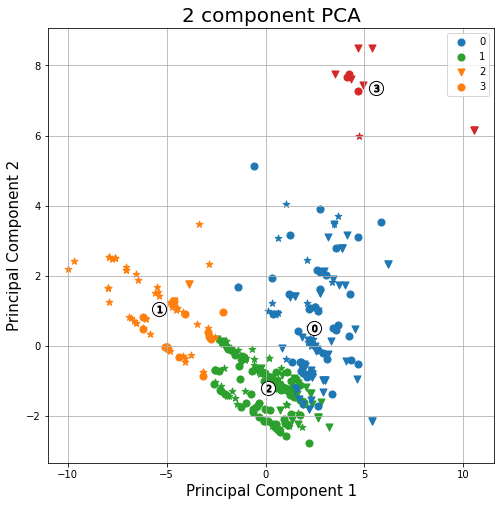

In [156]:
#markers - https://matplotlib.org/stable/api/markers_api.html

#colors = ['r', 'g', 'b', 'y', 'k', ]
colors = list(mcolors.TABLEAU_COLORS)
marker = ['o', 'v', '*', '+', 'd' , 'x',"1", "s"]

labels = principalDf[comp_label].unique()

labelDic ={}
i = 0

#Assuming labels are not more then the markers
for label in labels :
  labelDic[label] = marker[i]
  i = i + 1

labelDic

#Plot

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = [*range(optimalClusterSize)]


for i in range(len(principalDf)):
  ax.scatter(principalDf.loc[i, 'principal component 1']
             , principalDf.loc[i, 'principal component 2']
             , c = colors[principalDf['ClusterId'][i]]
             , marker = labelDic.get(principalDf[comp_label][i])
             , s = 50)


for target, color in zip(targets,colors):
    # indicesToKeep = principalDf['ClusterId'] == target
    # ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
    #            , principalDf.loc[indicesToKeep, 'principal component 2']
    #            , c = color
    #            , s = 50)
    
    # Find the center of the cluster
    x_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[0]
    y_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[1]

    ax.scatter( x_c,   y_c,    marker="o",   c="white",  alpha=1, s=200,  edgecolor="k" )
    ax.scatter(x_c,   y_c,  marker="$%d$" % target, alpha=1, s=50, edgecolor="k")




ax.legend(targets)
ax.grid()

In [157]:
# 3d Plot with PCA for 3 dimensions


In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head() 

,principal component 1,principal component 2,principal component 3
0,-1.381138,1.666361,-1.815837
1,0.514920,-2.239843,0.833383
2,-4.631746,1.265804,0.160934
3,-4.631746,1.265804,0.160934
4,-3.874072,1.758144,-2.783520


In [159]:
# Add the cluster labels



principalDf['ClusterId'] = cluster_labels.tolist()
principalDf.head() 

,principal component 1,principal component 2,principal component 3,ClusterId
0,-1.381138,1.666361,-1.815837,0
1,0.514920,-2.239843,0.833383,2
2,-4.631746,1.265804,0.160934,1
3,-4.631746,1.265804,0.160934,1
4,-3.874072,1.758144,-2.783520,1


In [160]:
# Add the cluster labels

# finalDf = pd.concat([principalDf, cluster_labels, axis = 1)
# finalDf.head()


principalDf['ClusterId'] = cluster_labels.tolist()
principalDf[comp_label] = df[comp_label]
principalDf.head() 

,principal component 1,principal component 2,principal component 3,ClusterId,mutation_assessor_class
0,-1.381138,1.666361,-1.815837,0,low
1,0.514920,-2.239843,0.833383,2,low
2,-4.631746,1.265804,0.160934,1,neutral
3,-4.631746,1.265804,0.160934,1,low
4,-3.874072,1.758144,-2.783520,1,neutral


In [161]:
colors

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


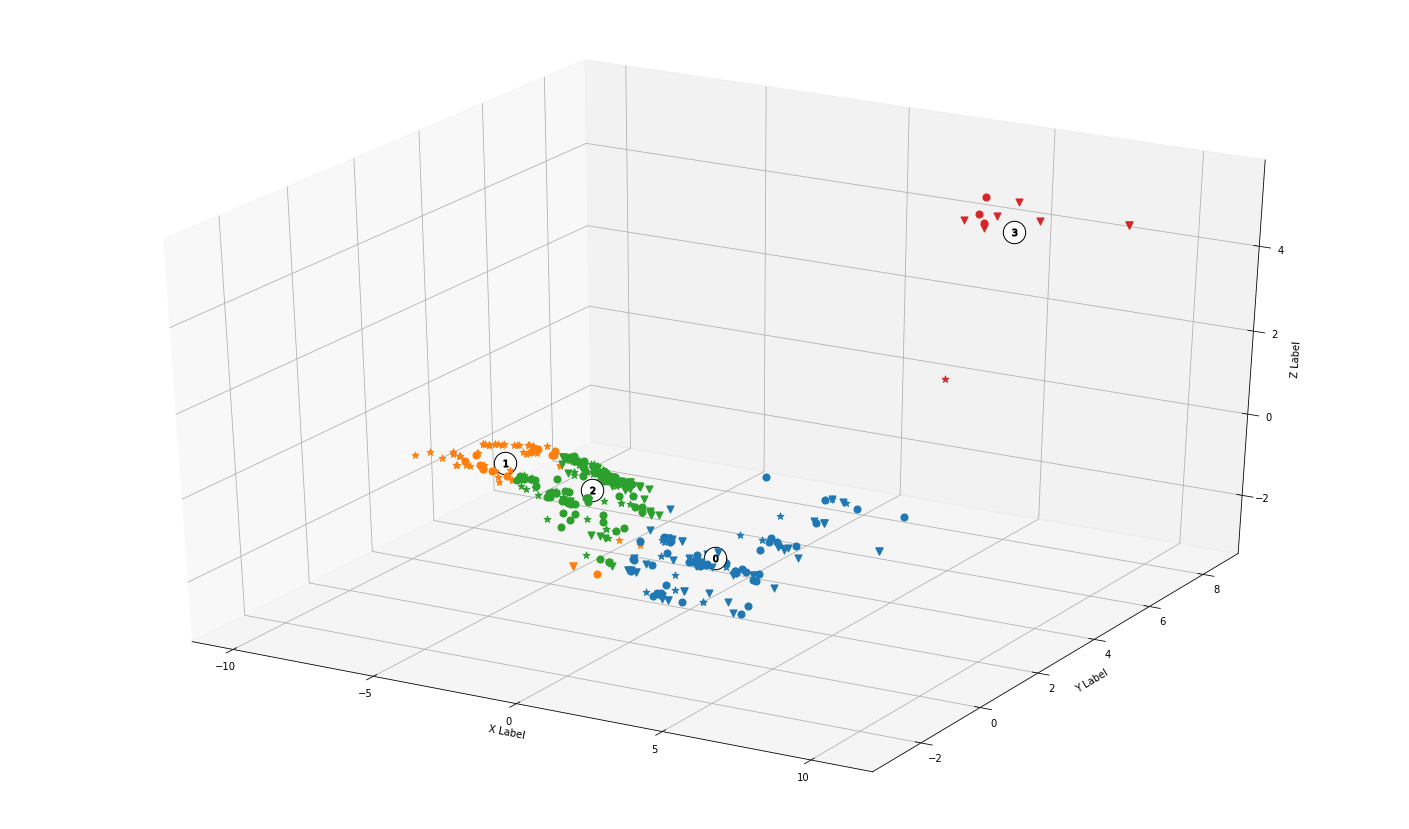

In [162]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(25)
# ax.figure(figsize=(100, 70), dpi=180)
ax = fig.add_subplot(projection='3d')



cluster_labels = principalDf['ClusterId'].to_numpy()
x= principalDf['principal component 1'].to_numpy()
y= principalDf['principal component 2'].to_numpy()
z= principalDf['principal component 3'].to_numpy()

#colors = cm.nipy_spectral(cluster_labels.astype(float) / optimalClusterSize)
#ax.scatter(x,y,z, c= colors)
targets = [*range(optimalClusterSize)]


for i in range(len(principalDf)):
  ax.scatter(principalDf.loc[i, 'principal component 1']
             , principalDf.loc[i, 'principal component 2']
             , principalDf.loc[i, 'principal component 3']
             , c = colors[principalDf['ClusterId'][i]]
             , marker = labelDic.get(principalDf[comp_label][i])
             , s = 50)
  


# Find the center of the cluster
for target in [0,1,2,3,4] :
    x_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[0]
    y_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[1]
    z_c = principalDf.loc[principalDf['ClusterId'] == target].mean()[2]

    ax.scatter( x_c,   y_c, z_c,    marker="o",   c="white",  alpha=1, s=500,  edgecolor="k" )
    ax.scatter(x_c,   y_c, z_c, marker="$%d$" % target, alpha=1, s=50, edgecolor="k")


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Additional Analysis


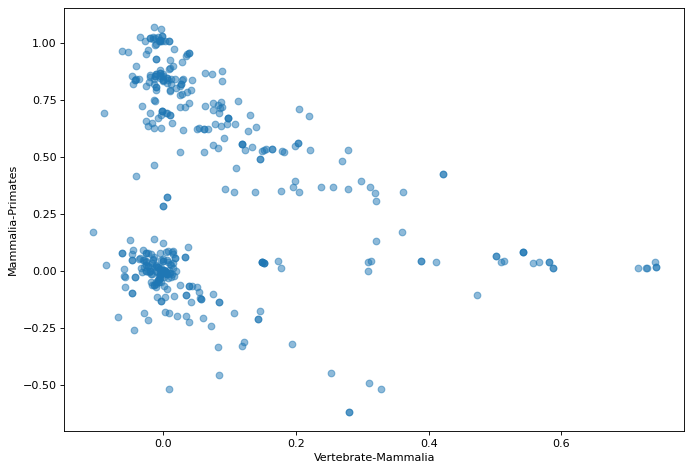

In [163]:
# Scatterplot
from matplotlib.pyplot import figure

figure(figsize=(10, 7), dpi=80)
plt.scatter(data=df, x='Vertebrate_Mammalia', y = 'Mammalia_Primates' , alpha=0.5)
plt.xlabel('Vertebrate-Mammalia')
plt.ylabel('Mammalia-Primates')
plt.show()


In [164]:
#finding distance

from scipy.spatial.distance import pdist, squareform

d = squareform(pdist(scaled_df, 'euclidean'))
print(d.shape)
print(d)
# print(m)

(402, 402)
[[0.         5.49435858 4.19074149 ... 4.18155927 4.37886231 6.91115156]
 [5.49435858 0.         6.51520061 ... 8.17193079 5.28580313 9.69321019]
 [4.19074149 6.51520061 0.         ... 5.25629183 2.21681067 4.48559503]
 ...
 [4.18155927 8.17193079 5.25629183 ... 0.         5.66226983 5.19608918]
 [4.37886231 5.28580313 2.21681067 ... 5.66226983 0.         5.07048266]
 [6.91115156 9.69321019 4.48559503 ... 5.19608918 5.07048266 0.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


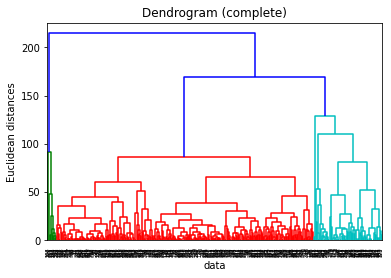

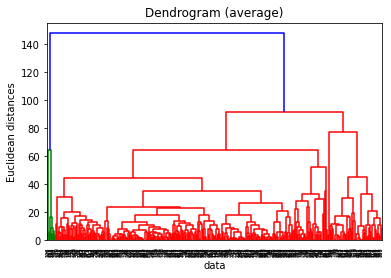

In [165]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram

methodNames = ['ward', 'single', 'complete', 'average', 'weighted' , 'centroid']
methodNames = ['complete', 'average']

for methodName in methodNames:
  dLinkage = sch.linkage(d, method = methodName)
  dendrogram = sch.dendrogram(dLinkage) # finding the optimal number of clusters using dendrogram

  plt.title('Dendrogram (' + methodName + ')') # title of the dendrogram
  plt.xlabel('data') # label of the x-axis
  plt.ylabel('Euclidean distances') # label of the y-axis
  plt.show() # show the dendrogram

In [166]:
#pd.DataFrame(d)

In [167]:
#dLinkage.shape

In [168]:
# cutting the tree - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cut_tree.html
from scipy import cluster


# get the dblinkage for complete and average

dLinkageComp = sch.linkage(d, method = "complete")

dLinkageAvg = sch.linkage(d, method = "average")



cutreeComp = cluster.hierarchy.cut_tree(dLinkageComp, n_clusters=[6])

cutreeAvg = cluster.hierarchy.cut_tree(dLinkageAvg, n_clusters=[6])

cutreeComp.shape , cutreeAvg.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  if __name__ == '__main__':


((402, 1), (402, 1))

In [169]:
# DataFrame(cutreeComp).value_counts() , DataFrame(cutreeAvg).value_counts()

In [170]:
# a = DataFrame(cutreeComp)[0]
# a

In [171]:
#table showing the common clusters
pd.crosstab(DataFrame(cutreeComp)[0], DataFrame(cutreeAvg)[0])

,0,1,2,3,4,5
0,,,,,,
0,286,0,23,0,0,0
1,0,63,0,0,0,0
2,0,0,1,8,0,0
3,0,0,17,0,0,0
4,0,0,0,0,2,0
5,0,0,0,0,0,2


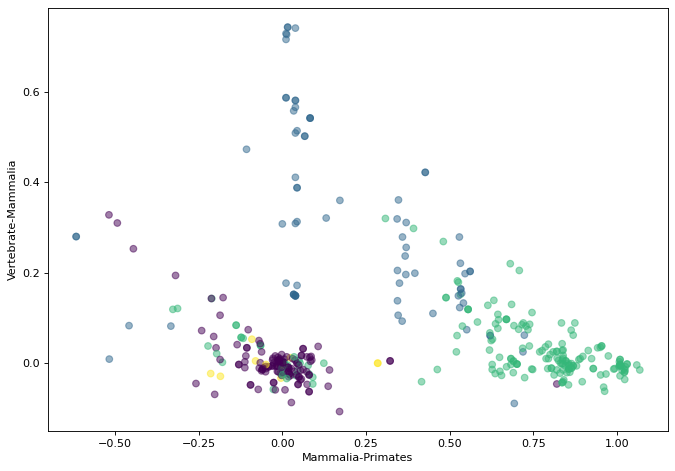

In [172]:
#Plot Vert_ mam and Mam_Prim

figure(figsize=(10, 7), dpi=80)
plt.scatter(data=df,  x = 'Mammalia_Primates' ,y='Vertebrate_Mammalia', alpha=0.5, c= cluster_labels )
plt.xlabel('Mammalia-Primates')
plt.ylabel('Vertebrate-Mammalia')

plt.show()

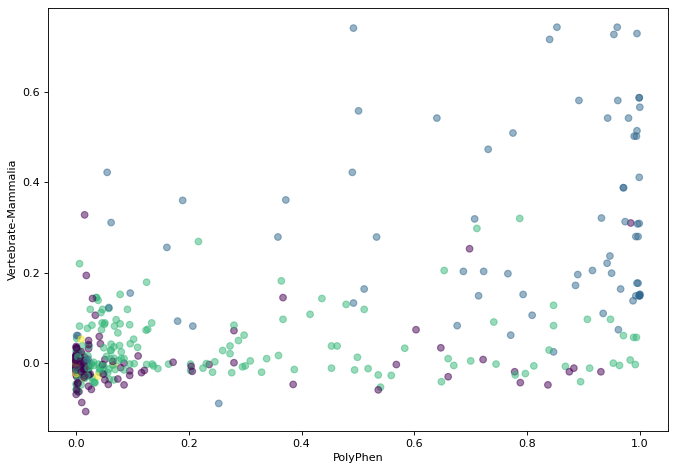

In [173]:
#Plot Vert_ mam and Mam_Prim - PolyPhen
#plot(Vertebrate_Mammalia ~ PolyPhen ,fgadata, col=kc_fga$cluster)

figure(figsize=(10, 7), dpi=80)
plt.scatter(data=df,  x = 'PolyPhen' ,y='Vertebrate_Mammalia', alpha=0.5, c= cluster_labels )
plt.xlabel('PolyPhen')
plt.ylabel('Vertebrate-Mammalia')

plt.show()

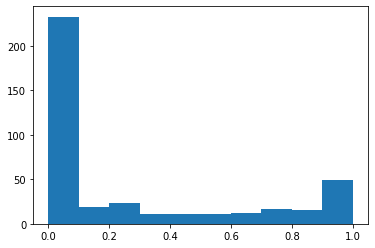

In [174]:
#Histogram

plt.hist(data=df, x = 'PolyPhen'  )
plt.show()

In [175]:
# scaled_df.head()